<h1 style="text-align:Center; color:#00A7E1;"> Jupyter Notebook Tutorial </h1>
<h4 style="text-align:Center; color:#00A7E1;"> Mary Lauren Benton, Ling Chen, and Laura Colbran </h4> 

<center>
[![](img/jupyter_logo.png)](https://jupyter.org/)

<a id='Contents'></a>
<h2 style="text-align:Center; color:#00A7E1;">- Contents -</h2>

<h3 style="text-align:left; color:#56BD46;"> Getting Started  </h3>
- [Overview](#what)
- [Installation](#install) 
- [Running it via ACCRE](#accre)
- [Kernels](#kernels)

<h3 style="text-align:left; color:#56BD46;"> Inside Jupyter  </h3>
- [Markdown Cell](#markdown) 
    - [Normal markdown](#normal_markdown)
    - [Math functions](#math_expression)<br>
    <br>
- [Code Cell](#codecell) 
    - [Interactive data visualization](#interactive_plotting)
    - [Magic functions](#magic)<br>
    <br>
- [Raw NBconvert Cell](#rawnb)

<h3 style="text-align:left; color:#56BD46;"> Share your notebook!  </h3>
- [via nbconvert](#nbconvert)
- [via github](#github)
- [via github gist](#gist)
 
<h3 style="text-align:left; color:#56BD46;"> Tricks and Tips  </h3>
- [ML](#ml)
- [et al.](#etal)
- [hide code trick](#hidecode)

<h3 style="text-align:left; color:#56BD46;"> Other </h3>
- [Useful Links](#links)

<a id='what'></a>
<h2 style="text-align:Center; color:#00A7E1;">- Overview -</h2>
Jupyter is designed to be an interactive way of presenting your __JU__lia, __PYT__hon, or __R__code input right next to the figures, along with explanations and comments. It's a good way to document your code and remember which exact snippet made which plot or ran which test.

Jupyter had its origins in the IPython notebook, but by 2014 they'd realized that a lot of the functions they were making didn't actually depend on the language being used. So they turned the language-agnostic bits into the Jupyter Project, and kept IPython for the Python-specific aspects of it.

It runs in your web browser, and you can use it to do all your text editing and coding just like normal. The difference is that it has built-in organization and makes it very easy to keep track of what you're doing. It includes a lot of the features of R Markdown files, and can be converted to many other file types, including exectuable scripts, HTML, and PDF. 

***
[Contents](#Contents)

<a id='install'></a>
<h2 style="text-align:Center; color:#00A7E1;">- How to Install -</h2>

<h4 style="text-align:left; color:#FF5555;"> Get Anaconda:  </h4>
[Download](https://www.anaconda.com/download/) or lmod (`module load Anaconda3`)

<h4 style="text-align:left; color:#FF5555;"> Create a new Conda environment:  </h4>
`conda create --name myenv`
<h4 style="text-align:left; color:#FF5555;"> Activate it:  </h4>
`source activate myenv`
<h4 style="text-align:left; color:#FF5555;"> Start the Notebook App:  </h4>
`jupyter notebook`

You'll land here:
<img src="img/jupyter_landing.png">  


<br>
For this example, we'll be using the `capra_py3` environment. You can recreate it like this:
```
conda create --name capra_py3.6 python=3.6
source activate capra_py3.6
conda install rpy2 seaborn jupyterthemes nb_conda
```

<br>
Or, you can use the `capra_py3.yml` file in the tutorial directory with: `conda env create -f capra_py3.yml`.  

<br>
_Don't worry too much about understanding this section. We'll write up a specific Conda & virtual environment tutorial._  



***
[Contents](#Contents)

<a id='accre'></a>
<h2 style="text-align:Center; color:#00A7E1;">- Running it via ACCRE -</h2>

We can edit these notebooks using the browser on your local machine. We'll launch a job on an ACCRE compute node and then "tunnel" in by connecting our local machine to the node. (Added bonus: you feel like you're doing some legit hacker stuff. But don't worry, it's ACCRE supported.)

Let's look at the template SLURM script:

In [2]:
!cat launch_nb.slurm

#!/bin/bash
#SBATCH --ntasks=1
#SBATCH --mem=2G               # 2Gb memory
#SBATCH --time=0-04:00:00      # 4 hours
#SBATCH --output=notebook.out

# Once this job launches, check the node it landed on with:
#      squeue --user=userid
# Then open tunnel from local machine with something like:
#      ssh -L 9999:vmpXXX:7777 vunetid@login.accre.vanderbilt.edu
# This binds port 9999 on localhost to port 7777 on vmpXXX
# Finally, point your local browser to localhost:9999

PORT=7777
echo To open a tunnel from local machine, 
echo Execute in a new terminal window:
echo "ssh -L 9999:$HOSTNAME:$PORT $(whoami)@login.accre.vanderbilt.edu"
printf '=%.0s' {1..80}
echo

module load Anaconda3      # load python 
source activate capra_py3  # load virtual environment

jt -t solarizedd -f anonymous -ofs 10 -cellw 90%  # optionally set theme

jupyter notebook --no-browser --ip='*' --port=${PORT}



With this, all you need to do is (optionally) update the conda environment and the theme command (more on that later!). Sumbit the script using `sbatch launch_nb.slurm`. 

<br>
Once your job starts on ACCRE, you can `cat notebook.out` to see the copy of the `ssh` command you'll need to use. When I wrote this cell it was:

<br>
`ssh -L 9999:vmp1015:7777 bentonml@login.accre.vanderbilt.edu`

<br>
Open a new terminal window and paste that in. You will have to type your ACCRE password. Once you're logged in, you can open your favorit browser window (Chrome, Safari, etc.) and direct it to `localhost:9999/`. This should bring up Jupyter landing screen you saw above. 

<br>
Voila! You're now running a Jupyter notebook on the cluster.

***
[Contents](#Contents)

<a id='kernels'></a>
<h2 style="text-align:Center; color:#00A7E1;">- Kernels -</h2>
Kernels are basically the back-end that the notebook runs. By default it'll run 
whatever version of Python was installed along with Anaconda. But what if you work in another language?

Use Anaconda to install another 'kernel'.
<h4 style="text-align:left; color:#FF5555;"> R:  </h4>
```conda install -c r r-irkernel```

<h4 style="text-align:left; color:#FF5555;"> Julia:  </h4>
```conda install -c conda-forge julia```

Kernels are available for many, many other languages too:
[Kernels on GitHub](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

One other note: If you look up in the top corner of your notebook you should see something like this:

<img src="img/jupyter_kernelname.png" width=40%>  

<br>
The environment name in `[brackets]` is the one that is currently running. Double check that this is the environment you intended to run. If not, choose `Kernel/Change Kernel` from the header menu and pick the one you want. 
<img src="img/jupyter_choosekernel.png" width=50%>  


***
[Contents](#Contents)

<h2 style="text-align:Center; color:#00A7E1;">- Inside Jupyter -</h2>
<h4 ><a id='markdown' style="text-align:left; color:#FF5555">Markdown Cell:  </h4>
- <a id='normal_markdown' style='color:#FF5555; font-weight:bold'>Normal markdown</a>: [Markdown cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#html)<br>
<br>
- <a id='math_expression' style='color:#FF5555; font-weight:bold'> Math functions</a>: 
    - `mathjax`: a javascript implementation of LaTeX that allows equations to be embedded into HTML.<br> For example, this markup: 
```
$$\log_{2}\frac{\frac{\sum_{1}^{n}Reads_i,mod}{TotalReads_{mod}}}{\frac{\sum_{1}^{n}Reads_i,bg}{TotalReads_{bg}}}$$ 
```

       Turns to:
$$\log_{2}\frac{\frac{\sum_{1}^{n}Reads_i,mod}{TotalReads_{mod}}}{\frac{\sum_{1}^{n}Reads_i,bg}{TotalReads_{bg}}}$$ 
<br>
<br>
    - In a code block, `Sympy` and `LaTex` can be used for math expression too. `SymPy` is a python library for symbolic mathematics. [SymPy documentation](http://docs.sympy.org/latest/index.html). `LaTex` can be used with `%%latex` magic function:

In [1]:
%%latex
\begin{align}
\LaTeX\\
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

***
[Contents](#Contents)

<h4 ><a id='codecell' style="text-align:left; color:#FF5555;">Code Cell:  </h4>
- <a id='interactive_plotting' style='color:#FF5555; font-weight:bold'>Interactive data visualization</a>:

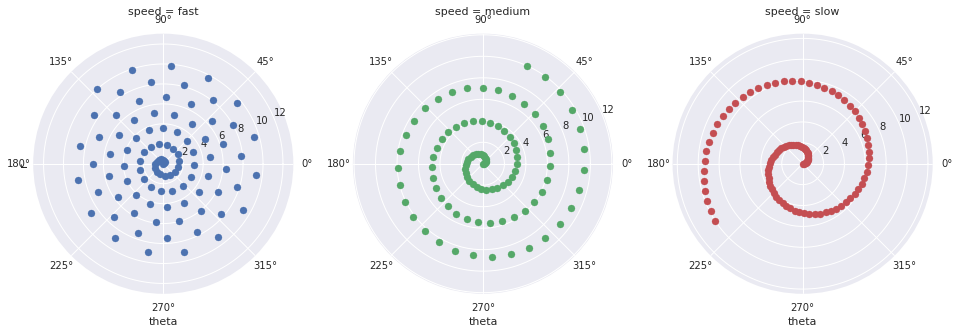

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "theta", "r")

plt.show()

***
[Contents](#Contents)

- <a id='magic' style='color:#FF5555; font-weight:bold'>Magic functions</a>: <br>
There are some predefined magic functions that we can call with a command line style syntax. They all start with `%` (single line usage) or `%%` (multiple lines usage).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`%lsmagic` gives which magic commands we have available in our interpreter.

In [7]:
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`%%bash` let you run bash commands.

In [8]:
%%bash
bash img/dino.sh danger!




                                   __  
                                  / _)  run, silly human!
                           .-^^^-/ /  
                        __/       /  
                       <__.|_|-|_|  


			




&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`!` can be used to run bash commands too.

In [9]:
!bash img/dino.sh danger!




                                   __  
                                  / _)  run, silly human!
                           .-^^^-/ /  
                        __/       /  
                       <__.|_|-|_|  


			




&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `%time, %%time` and `%timeit, %%timeit` are useful to time the execution time of code.

In [10]:
%time x = range(1000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.7 µs


In [11]:
%%timeit -n 1000
def getx():
    x = range(1000)
    return x
getx()

611 ns ± 46.2 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`%load` can be used to load script from file.

In [ ]:
# %load img/dino2.sh
printf "\n\n\n"
printf "                                   __  \n"
printf "                                  / _)  "
printf "                           .-^^^-/ /  \n"
printf "                        __/       /  \n"
printf "                       <__.|_|-|_|  \n"
printf "\n\n\t\t\t"
printf "\n\n"


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`%load_ext` can load an ipython extension by its module name. One useful usage is to load ipython rmagic extension that contains a some magic functions for working with R via rpy2. This extension can be loaded as following:

In [ ]:
# if we don't have rpy2 extension, we need to install it first.
# It only supports python3.
#!pip install rpy2

In [13]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`%store` provides lightweight persistence for python variables.

In [14]:
l = ['hello', 'world']
%store l

Stored 'l' (list)


In [ ]:
exit

In [ ]:
l

In [15]:
%store -r

In [16]:
l

['hello', 'world']

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`%%writefile` can write the contents of the cell to a file. The file will be overwritten unless the -a (--append) flag is specified.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;You can always see how to use a magic function by typing `?` infront of it.

In [17]:
?%%writefile

***
[Contents](#Contents)

<h4><a id='rawnb' style="text-align:left; color:#FF5555;">Raw NBconvert Block:</a></h4>
It can be used for write code that we don't want to run in the notebook, or java script (see [hide code trick](#hidecode)).

<h2 style="text-align:Center; color:#00A7E1;">- Share your notebook! -</h2>
<br>
The raw file of Jupyter notebook is a JSON document that contain text, source code, rich media output, and metadata. Each segment of the document is stored in a cell. To render and share it, here are some options. 

<br>
<h4><a id='nbconvert' style="text-align:left; color:#FF5555;">Convert to other formats with nbconvert:</a></h4>
You can use the nbconvert command to convert the notebook document file to other formats, such as HTML, PDF, LaTex, Markdown, ... For instance, if we want to convert to html file, just do:
```
jupyter nbconvert --to html your_notebook.ipynb
```
<h4><a id='github' style="text-align:left; color:#FF5555;">Publish notebooks on Github</a></h4>
1. Create a repository on github.
2. Initiate the current directory with jupyter notebooks as an git repository if not already.
```
ml Intel git  # Lmod load Intel compiler and git
git init
```
3. Stage and commit the Jupyter notebook you want to push to github.
```
git add your_notebook.ipynb
git commit -m 'some message, such as, your_notebook.ipynb added'
```
4. Push to github
```
git remote add origin your_github_repository_url
git push -u origin master
```
5. Check it out on github!

<br>
<h4><a id='nbconvert' style="text-align:left; color:#FF5555;">Publish as a github gist</a></h4>
Unlike using regular github repository, if you want to share the notebook to others, you have to either make it public or add other people as collaborators. The good thing I like using github gist is that I can create it as a secrete gist that I can share with others. To do this:
<br>
1. Sign in to github
2. Navigate to your [gist home page](https://gist.github.com/).
3. Type an optional description and name for your gist.
4. Type the text of your gist into the gist text box.
5. We can choose to create a public gist or a secret gist.
6. Then we can git clone the gist to our local computer and version control, pull, push the gist repository as a regular git repo.
```
git clone your_gist_url test_gist_notebooks
git add your_notebook.ipynb
git commit -m 'some message, such as, your_notebook.ipynb added'
git remote add origin your_gist_url
git push -u origin master
```
7. View the notebook on gist, or even better, on [nbviewer](http://nbviewer.jupyter.org/), just give it the gist ID!
***
[Contents](#Contents)

<h2 style="text-align:Center; color:#00A7E1;">- Tricks and Tips -</h2>

<br>
<h4><a id='nbconvert' style="text-align:left; color:#FF5555;">Want a clean work report? Hide the code!:</a></h4>
This is one usage of Raw NBconvert cell. Put the following script at the very beginning of the notebook in a Raw NBconvert cell. When the notebook is converted to a html file or viewed through [nbviewer](http://nbviewer.jupyter.org/) website, the code will be hidden. Here is an example jupyter [notebook](http://nbviewer.jupyter.org/github/csaid/polished_notebooks/blob/master/notebook_polished.ipynb).

```
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
```

<h4><a id='jupytertheme' style="text-align:left; color:#FF5555;">A pretty theme makes everything better:</a></h4>
I won't write code on a white backgroud. Some people need to choose just the _right_ shade of blue for their headers. We all have quirks. Embrace them with notebook customizations using `jupyterthemes`.


<br>
We already installed the package into our evironment using `conda install jupyterthemes`. To activate a specific theme you type `jt -t [theme name]`. There are also a number of options to customize the font type, font size, line height, margins, cell width, and much more. I like to use the following:

<br>
`jt -t solarizedd -f anonymous -ofs 10 -cellw 90%`

<br>
This sets the [Solarized Dark theme](http://ethanschoonover.com/solarized), with [Anonymous Pro](https://www.marksimonson.com/fonts/view/anonymous-pro) as the default font. I increased the cell output font size a bit, and made the default width of my jupyter cells take up 90% of my browser window to give my code a bit of breathing room.

You can apply these themes to the figures within a notebook as well. See the difference: 

In [18]:
def rand_uniform(a,b,size=100):
    return np.random.rand(size) * (b - a) + a

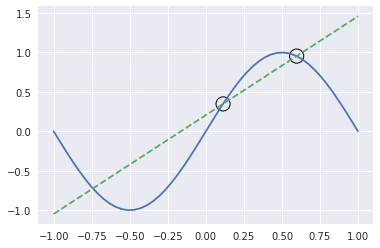

In [19]:
np.random.seed(90114)  # set random seed

x = np.linspace(-1,1)
f = lambda x: np.sin(np.pi * x)

dataX = rand_uniform(-1, 1, 2)
dataY = f(dataX)

best_line = np.poly1d(np.polyfit(dataX, dataY, 1))

plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX, dataY, label='data set', linewidths=1, color='black', facecolor='none', s=200);
plt.plot(x,best_line(x),'--',label='best line');

In [26]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# context == paper, notebook, talk, or poster
jtplot.style(context='notebook', fscale=1.5)

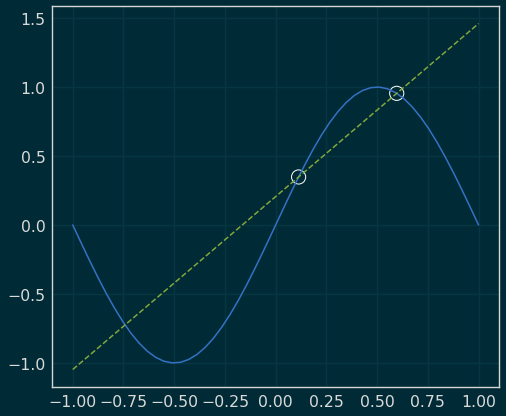

In [27]:
plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX, dataY, label='data set', linewidths=1, color='white', facecolor='none', s=200);
plt.plot(x,best_line(x),'--',label='best line');

More instructions and customizations can be found on the developer's Github [here](https://github.com/dunovank/jupyter-themes/).

<h4><a id='nbconvert' style="text-align:left; color:#FF5555;">Is it Python? Is it R? ...Maybe it's _BOTH_:</a></h4>
Here's an example of some mixed language code using that `rpy2` extension we loaded earlier.

In [23]:
import scipy.stats

In [ ]:
# install a quick dependency for this example
#!conda install -y xlrd

In [24]:
# this code is setting up some simulations to recreate Fig 1 from Mostafavi et al. 2017
alpha = 5 * (10**-8)
n_sims = 100
freq_range = np.arange(0.05, 0.5, step=0.05)

# set the potential allele frequency trend
allele_fractions = np.array([1.0, 0.95, 0.9, 0.86, 0.83, 0.81, 0.8, 0.8, 0.81, 0.83, 0.86, 0.9, 0.95, 1.0])

# read in age distribution data from the paper -- note: some nifty pandas tricks are hidden in here!
age_df = pd.read_excel("https://doi.org/10.1371/journal.pbio.2002458.s035", sheet_name="Data for Fig S2")
age_df['APPROX_COUNT'] = round(age_df.FREQ  * 57696)
ages = np.array(age_df.APPROX_COUNT, dtype=int)

# set the number of age groups and power values
n_groups = len(ages)
power_py = np.empty(len(freq_range))
power_r  = np.empty(len(freq_range))

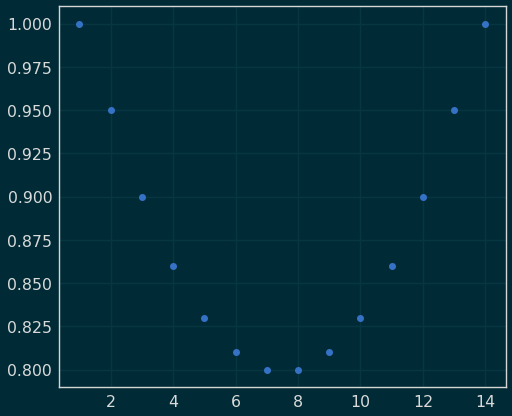

In [28]:
_ = plt.plot(age_df.AGEBIN.values, allele_fractions, 'o')

In [29]:
%%R
chisquare_r <- function(obs, exp) {
    chi <- chisq.test(x = obs, p = exp, rescale = TRUE, correct = FALSE)
    return(chi$p.value)
}

In [32]:
for i, freq in enumerate(freq_range):
    # set group allele frequencies
    group_freqs = allele_fractions * freq
    exp_freqs = [freq] * n_groups

    # preallocate empty array
    sim_p, sim_r = np.empty(n_sims), np.empty(n_sims)

    # run x number of simulations at frequency
    for sim in range(n_sims):
        # calculate observed and expectation
        observed = np.random.binomial(n=2*ages, p=group_freqs)
        expected = np.random.binomial(n=2*ages, p=exp_freqs)

        # rescale expected values to match R-- adjusts expected values according to proportion
        prop_exp = expected / sum(expected)
        scaled_exp = sum(observed) * prop_exp

        # perform chi square in scipy
        result = scipy.stats.chisquare(observed, scaled_exp)
        sim_p[sim] = result[1]

        # perform chi square in r
        %R -i observed,expected -o result result=chisquare_r(observed, expected)
        sim_r[sim] = result[0]
        
    print("Power (allele frequency = {:.2f}): {:.3f}, {:.3f}".format(freq,
                                                                     np.sum(sim_p < alpha) / float(n_sims),
                                                                     np.sum(sim_r < alpha) / float(n_sims)))

Power (allele frequency = 0.05): 0.170, 0.170
Power (allele frequency = 0.10): 0.480, 0.480
Power (allele frequency = 0.15): 0.810, 0.810
Power (allele frequency = 0.20): 0.960, 0.960
Power (allele frequency = 0.25): 1.000, 1.000
Power (allele frequency = 0.30): 1.000, 1.000
Power (allele frequency = 0.35): 1.000, 1.000
Power (allele frequency = 0.40): 1.000, 1.000
Power (allele frequency = 0.45): 1.000, 1.000


***
[Contents](#Contents)

<a id='links'></a>
<h2 style="text-align:Center; color:#00A7E1;">- Useful Links -</h2>

<h4 style="text-align:left; color:#FF5555;"> Additional Information:  </h4>
[Conda Cheatsheet](https://conda.io/docs/_downloads/conda-cheatsheet.pdf)  
[R Markdown](https://www.rstudio.com/wp-content/uploads/2015/03/rmarkdown-reference.pdf)<br>
[Jupyter notebook cheatsheet](https://www.scribd.com/document/361177485/Jupyter-Notebook-Cheat-Sheet)<br>
[Jupyter notebook keyboard shortcuts](https://www.cheatography.com/jorgejuan007/cheat-sheets/jupyter-notebook-editor/)

<h4 style="text-align:left; color:#FF5555;"> Tutorials:  </h4>
[DataCamp](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)  
[Vandy Bio8366 Ipython and Jupyter tutorial](https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/Section0_1-IPython_and_Jupyter.ipynb)

***
[Contents](#Contents)